# Sales Prediction : A Multivariate Approach

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
df_train = pd.read_csv('D:/Data and Computational Science/Summer/PROJECT/Dataset_Project/sales_train.csv', parse_dates = ['date'], infer_datetime_format = True, dayfirst = True)
df_test = pd.read_csv('D:/Data and Computational Science/Summer/PROJECT/Dataset_Project/test.csv')
df_shops = pd.read_csv('D:/Data and Computational Science/Summer/PROJECT/Dataset_Project/shops.csv')
df_items = pd.read_csv('D:/Data and Computational Science/Summer/PROJECT/Dataset_Project/items.csv')
df_item_categories = pd.read_csv('D:/Data and Computational Science/Summer/PROJECT/Dataset_Project/item_categories.csv')

In [3]:
# Shape check of each dataset
print("Shape of train:", df_train.shape)
print("Shape of test:", df_test.shape)
print("Shape of shops:", df_shops.shape)
print("Shape of items:", df_items.shape)
print("Shape of item_categories:", df_item_categories.shape)

Shape of train: (2935849, 6)
Shape of test: (214200, 3)
Shape of shops: (60, 2)
Shape of items: (22170, 3)
Shape of item_categories: (84, 2)


In [4]:
# Numerical statistics of train data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.0,14.569911,9.422988,0.0,7.0,14.0,23.0,33.0
shop_id,2935849.0,33.001728,16.226973,0.0,22.0,31.0,47.0,59.0
item_id,2935849.0,10197.227057,6324.297354,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,1.0,1.0,1.0,2169.0


## Exploratory Data Analysis

In [5]:
# Checking for null values in each datset

print("Null values in the train set :", df_train.isnull().sum().sum())
print("Null values in the test set :", df_test.isnull().sum().sum())
print("Null values in the item set :", df_items.isnull().sum().sum())
print("Null values in the shops set :", df_shops.isnull().sum().sum())
print("Null values in the item_categories set :", df_item_categories.isnull().sum().sum())

Null values in the train set : 0
Null values in the test set : 0
Null values in the item set : 0
Null values in the shops set : 0
Null values in the item_categories set : 0


C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


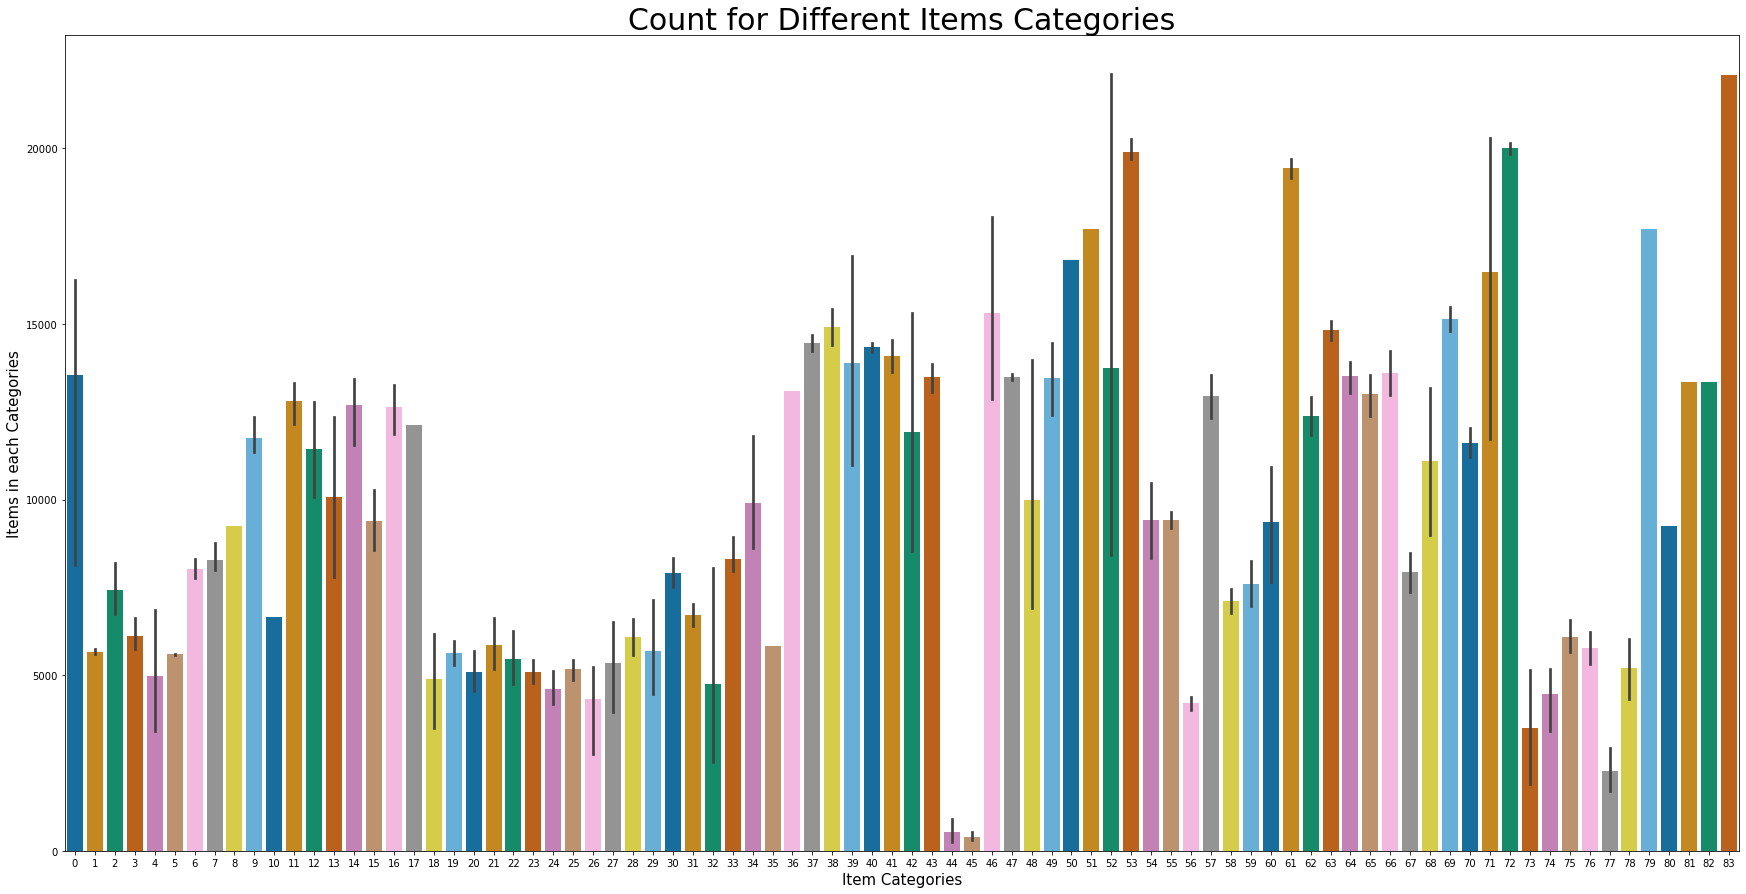

In [6]:
# Plot for frequency of items in each item category

plt.rcParams['figure.figsize'] = (30, 15)
sns.barplot(df_items['item_category_id'], df_items['item_id'], palette = 'colorblind')
plt.title('Count for Different Items Categories', fontsize = 30)
plt.xlabel('Item Categories', fontsize = 15)
plt.ylabel('Items in each Categories', fontsize = 15)
plt.show()

C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


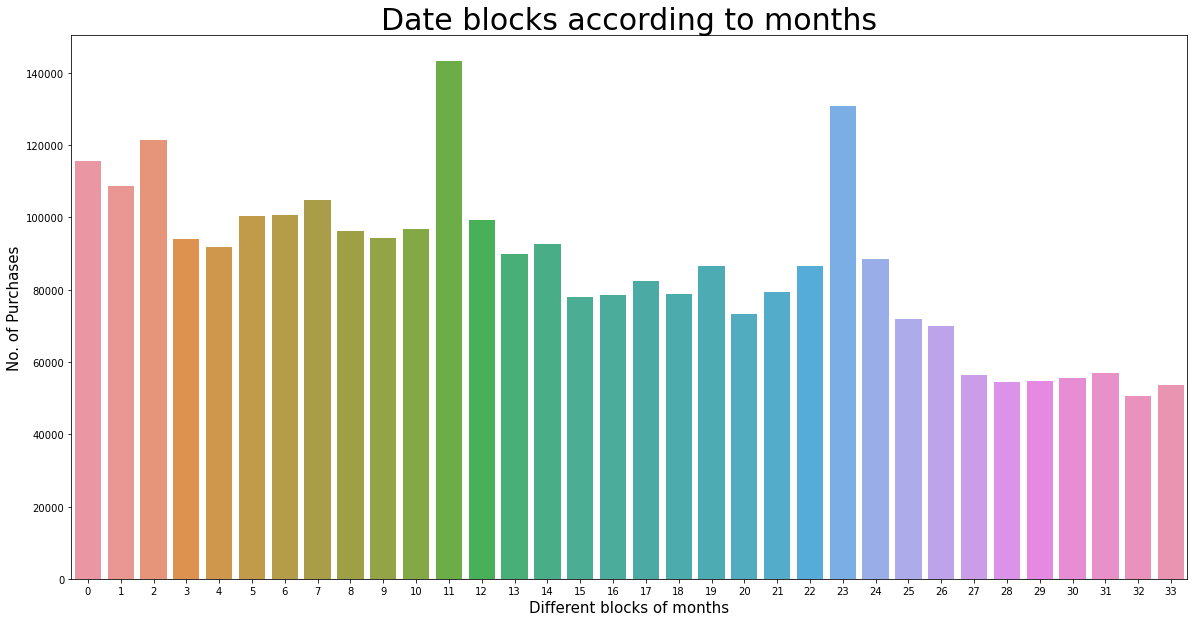

In [7]:
# Plot for Purchases per month

plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(df_train['date_block_num'])
plt.title('Date blocks according to months', fontsize = 30)
plt.xlabel('Different blocks of months', fontsize = 15)
plt.ylabel('No. of Purchases', fontsize = 15)
plt.show()

C:\Users\devan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


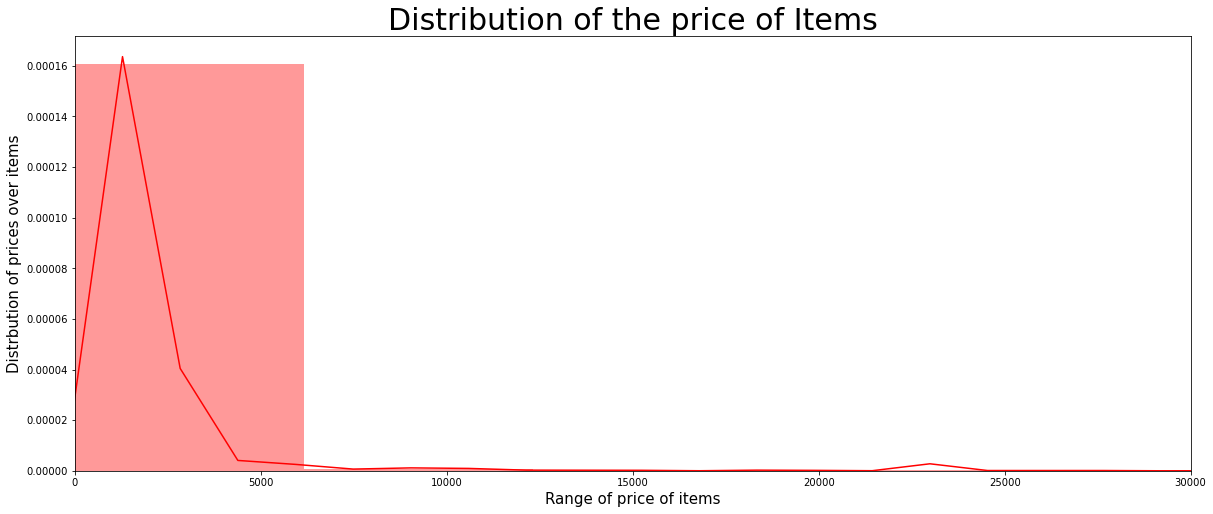

In [8]:
# Plot for item price distribution

plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(df_train['item_price'], color = 'red')
plt.title('Distribution of the price of Items', fontsize = 30)
plt.xlabel('Range of price of items', fontsize = 15)
plt.ylabel('Distrbution of prices over items', fontsize = 15)
plt.xlim([0,30000])
plt.show()

C:\Users\devan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


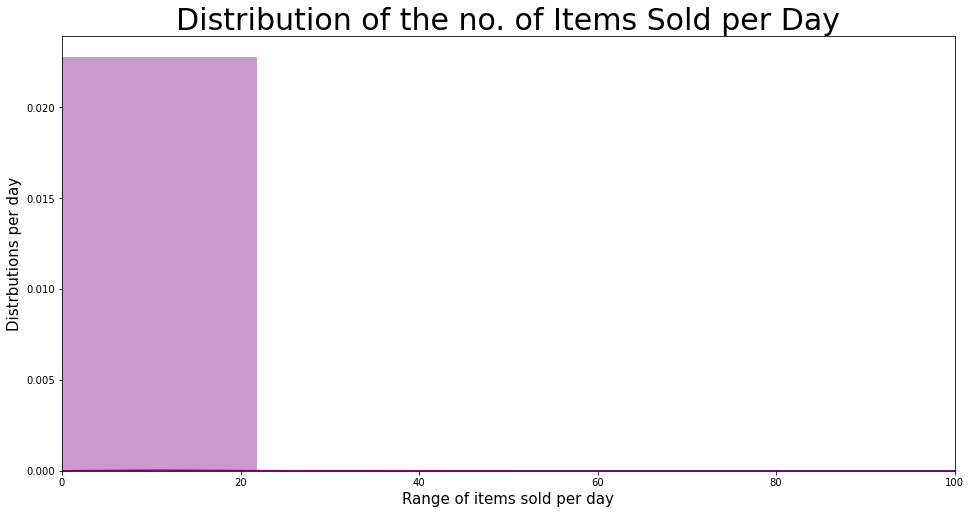

In [9]:
# Plot for distribution of items sold per day

plt.rcParams['figure.figsize'] = (16, 8)
sns.distplot(df_train['item_cnt_day'], color = 'purple')
plt.title('Distribution of the no. of Items Sold per Day', fontsize = 30)
plt.xlabel('Range of items sold per day', fontsize = 15)
plt.ylabel('Distrbutions per day', fontsize = 15)
plt.xlim([0,100])
plt.show()

In [10]:
# Count of unique items across stores

x = df_train['item_id'].nunique()
print("Unique Items Present in the stores available: ", x)

Unique Items Present in the stores available:  21807


In [11]:
# Count of unique items categories across stores

x = df_item_categories['item_category_id'].nunique()
print("The No. of Unique categories for Items Present in the stores available: ", x)

The No. of Unique categories for Items Present in the stores available:  84


In [12]:
# Count of unique stores across train dataset

x = df_train['shop_id'].nunique()
print("No. of Unique Shops are :", x)

No. of Unique Shops are : 60


In [13]:
# making a new column day
df_train['day'] = df_train['date'].dt.day

# making a new column month
df_train['month'] = df_train['date'].dt.month

# making a new column year
df_train['year'] = df_train['date'].dt.year

# making a new column week
df_train['week'] = df_train['date'].dt.week

C:\Users\devan\AppData\Local\Temp\ipykernel_2812\2315370736.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train['week'] = df_train['date'].dt.week


C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


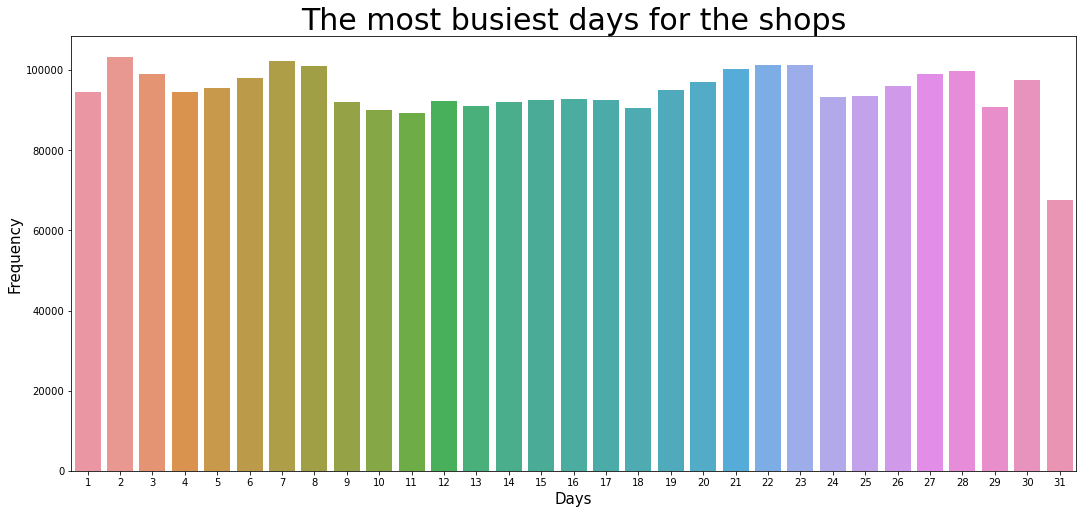

In [14]:
# Plot for most busiest days for the store

plt.rcParams['figure.figsize'] = (18, 8)
sns.countplot(df_train['day'])
plt.title('The most busiest days for the shops', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.show()

C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


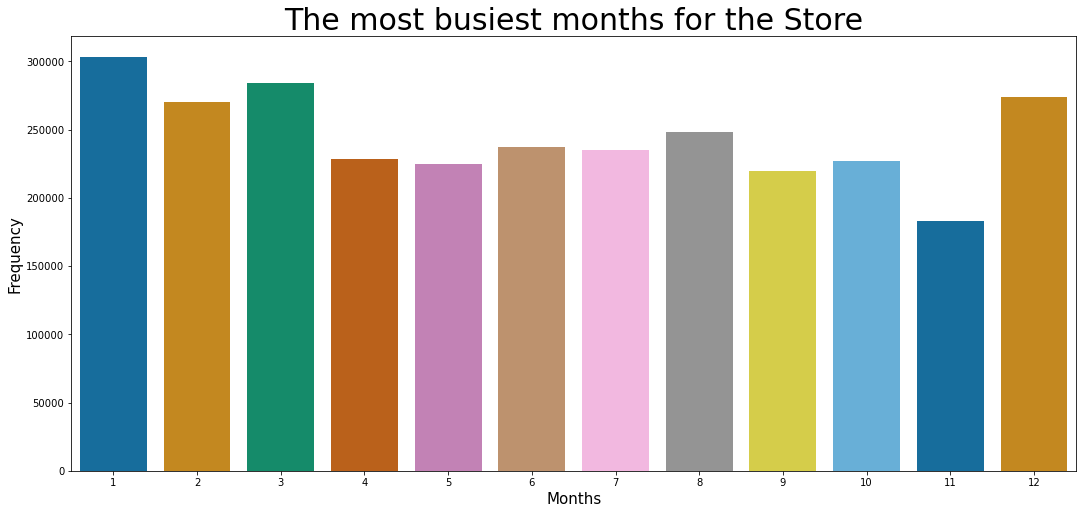

In [15]:
# Plot for most busiest months for the store

plt.rcParams['figure.figsize'] = (18, 8)
sns.countplot(df_train['month'], palette = 'colorblind')
plt.title('The most busiest months for the Store', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.show()

C:\Users\devan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


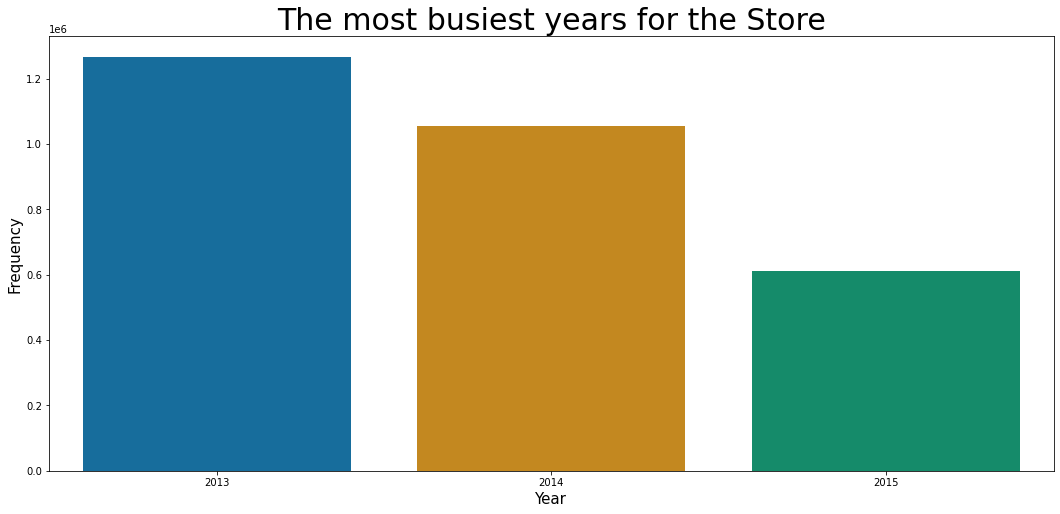

In [16]:
# Plot for most busiest years for the store

plt.rcParams['figure.figsize'] = (18, 8)
sns.countplot(df_train['year'], palette = 'colorblind')
plt.title('The most busiest years for the Store', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

plt.show()

C:\Users\devan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


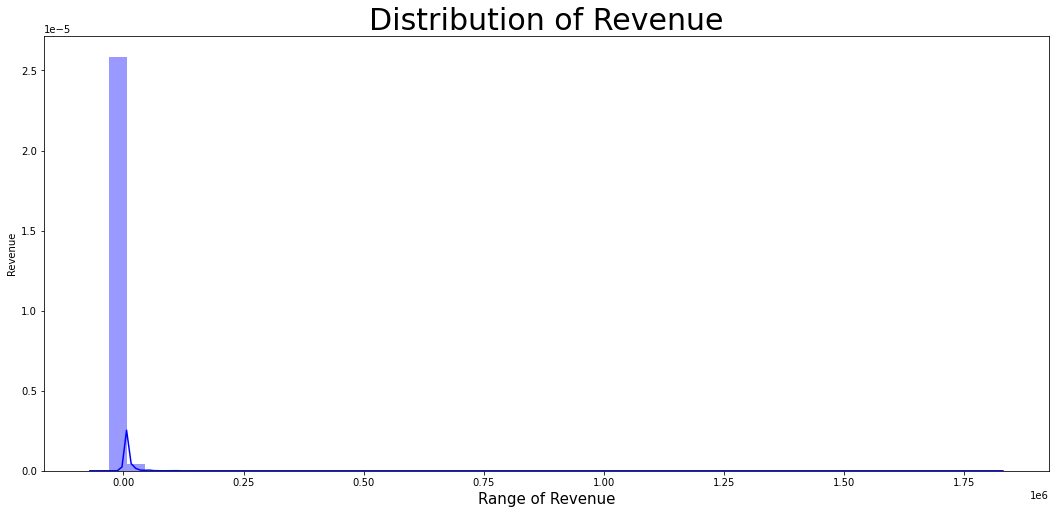

In [17]:
# feature engineering and selection

df_train['revenue'] = df_train['item_price'] * df_train['item_cnt_day']

sns.distplot(df_train['revenue'], color = 'blue')
plt.title('Distribution of Revenue', fontsize = 30)
plt.xlabel('Range of Revenue', fontsize = 15)
plt.ylabel('Revenue')
plt.show()

In [18]:
#Data types of train dataset
df_train.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
day                        int64
month                      int64
year                       int64
week                       int64
revenue                  float64
dtype: object

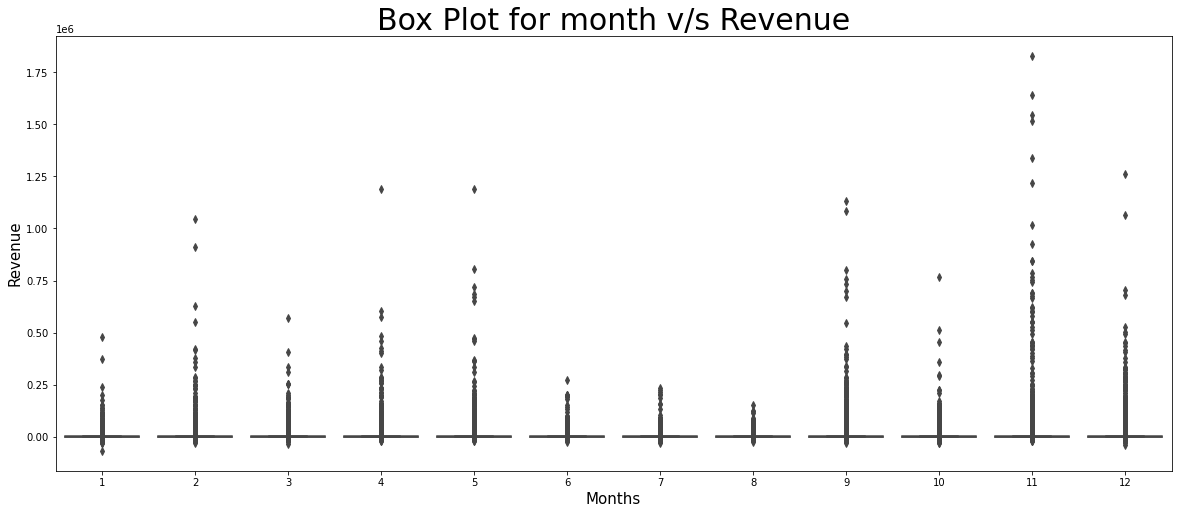

In [19]:
# Box Plot for month wise revenue

plt.rcParams['figure.figsize'] = (20, 8)
sns.boxplot(x = df_train['month'], y = df_train['revenue'])
plt.title('Box Plot for month v/s Revenue', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

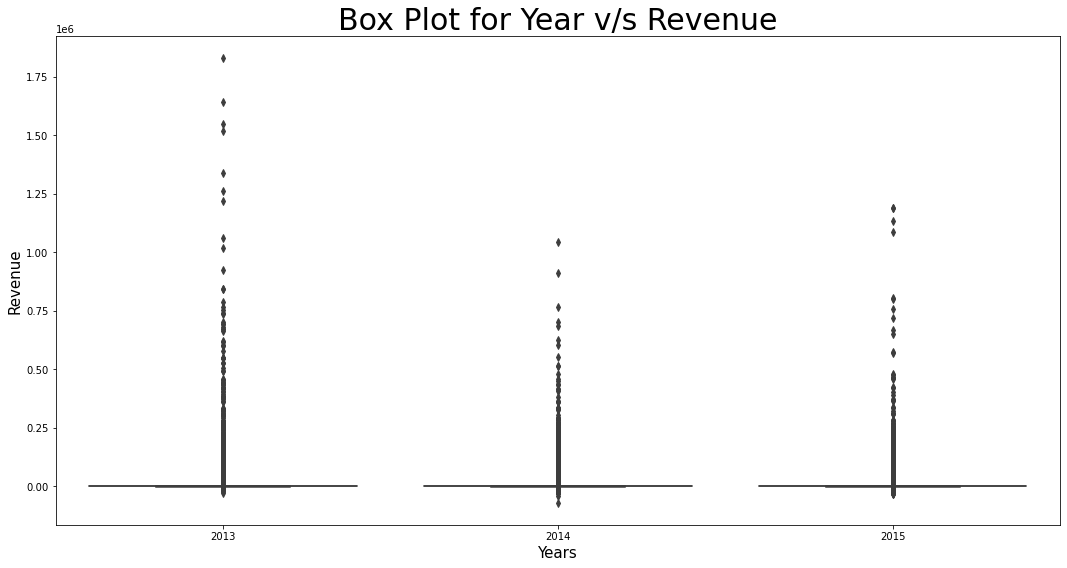

In [20]:
# Box Plot for year wise revenue

plt.rcParams['figure.figsize'] = (18, 9)
sns.boxplot(x = df_train['year'], y = df_train['revenue'])
plt.title('Box Plot for Year v/s Revenue', fontsize = 30)
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.show()

##  Merging all data sets to create master dataset

In [21]:
df_master = pd.merge(df_train, df_shops, how='left', left_on = 'shop_id', right_on = 'shop_id')
df_master = pd.merge(df_master, df_items, how='left', left_on='item_id', right_on='item_id')
df_master = pd.merge(df_master, df_item_categories, how='left', left_on='item_category_id', right_on='item_category_id')
df_master.drop(['item_id', 'item_category_id', 'shop_id'], axis=1, inplace=True)
df_master.head()

,date,date_block_num,item_price,item_cnt_day,day,month,year,week,revenue,shop_name,item_name,item_category_name
0,2013-01-02,0,999.00,1.0,2,1,2013,1,999.00,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),Кино - Blu-Ray
1,2013-01-03,0,899.00,1.0,3,1,2013,1,899.00,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
2,2013-01-05,0,899.00,-1.0,5,1,2013,1,-899.00,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,Музыка - Винил
3,2013-01-06,0,1709.05,1.0,6,1,2013,1,1709.05,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,Музыка - Винил
4,2013-01-15,0,1099.00,1.0,15,1,2013,3,1099.00,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),Музыка - CD фирменного производства


In [22]:
print(df_master.shape)  #Shape of the master data

(2935849, 12)


## Exploratory Data Analysis for Master Data

In [23]:
# change the data type of 'date'
df_master['date'] = pd.to_datetime(df_master['date'])
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int64         
 2   item_price          float64       
 3   item_cnt_day        float64       
 4   day                 int64         
 5   month               int64         
 6   year                int64         
 7   week                int64         
 8   revenue             float64       
 9   shop_name           object        
 10  item_name           object        
 11  item_category_name  object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 291.2+ MB


In [24]:
df_master[df_master.duplicated(keep='first')] #Removing Duplicates

,date,date_block_num,item_price,item_cnt_day,day,month,year,week,revenue,shop_name,item_name,item_category_name
76962,2013-01-05,0,149.0,1.0,5,1,2013,1,149.0,"Химки ТЦ ""Мега""",УЧЕНИК ЧАРОДЕЯ (регион),Кино - DVD
1435367,2014-02-23,13,999.0,1.0,23,2,2014,8,999.0,"Тюмень ТЦ ""Гудвин""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1496766,2014-03-23,14,999.0,1.0,23,3,2014,12,999.0,"Москва МТРЦ ""Афи Молл""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1671873,2014-05-01,16,999.0,1.0,1,5,2014,18,999.0,"Тюмень ТЦ ""Гудвин""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
1866340,2014-07-12,18,999.0,1.0,12,7,2014,28,999.0,"Москва ТРК ""Атриум""","Far Cry 3 (Classics) [Xbox 360, русская версия]",Игры - XBOX 360
2198566,2014-12-31,23,499.0,1.0,31,12,2014,1,499.0,"СПб ТК ""Невский Центр""",ЧЕЛОВЕК ДОЖДЯ (BD),Кино - Blu-Ray


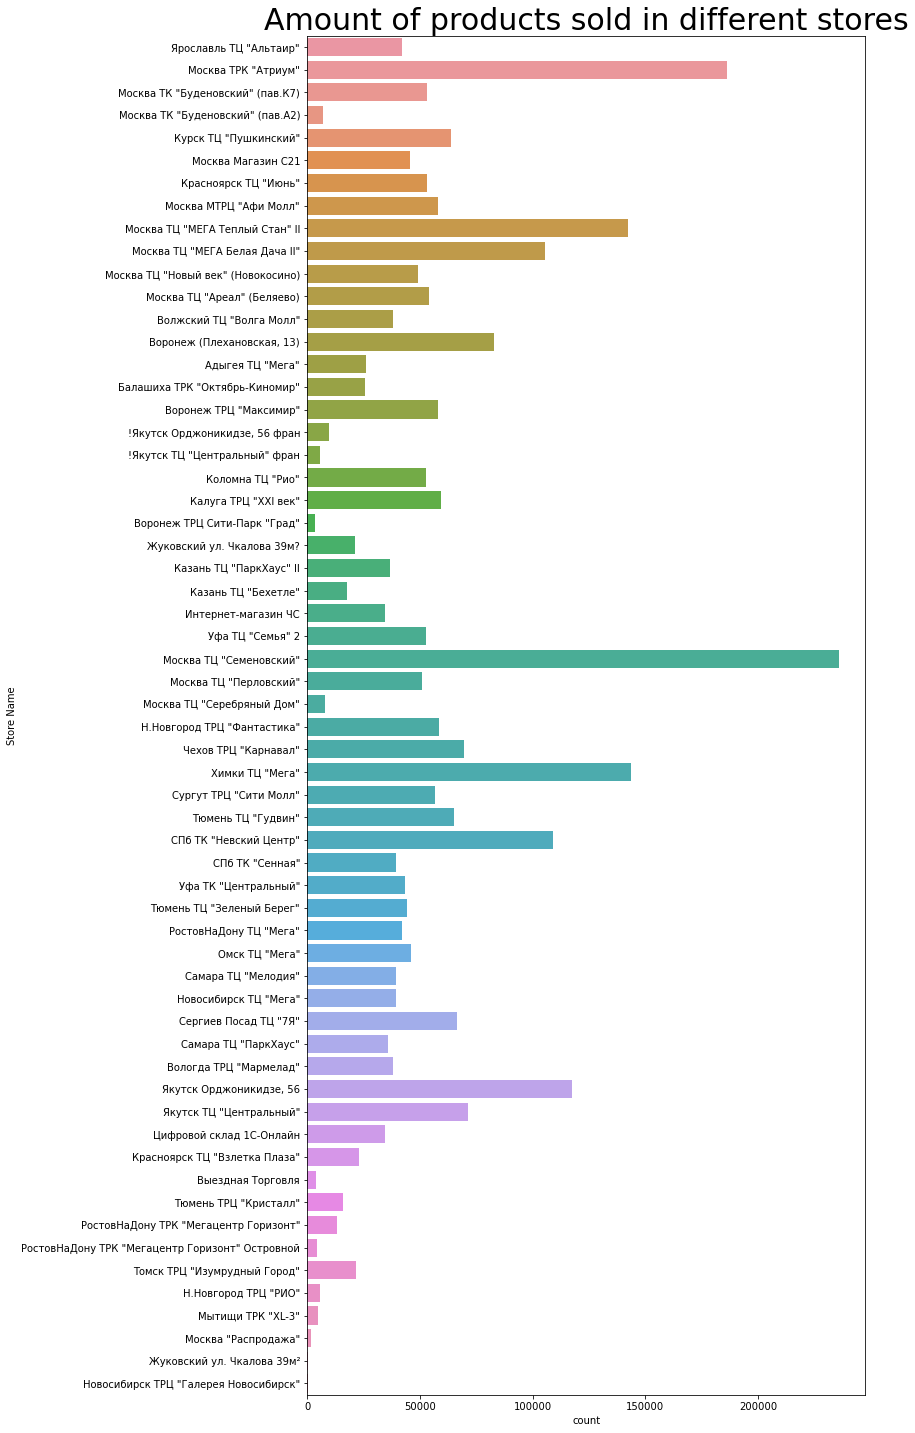

In [25]:
#Plot for products sold in each stores

plt.figure(figsize=(10, 25))
sns.countplot(y=df_master['shop_name'])
plt.ylabel('Store Name')
plt.title('Amount of products sold in different stores', fontsize = 30)
plt.show()

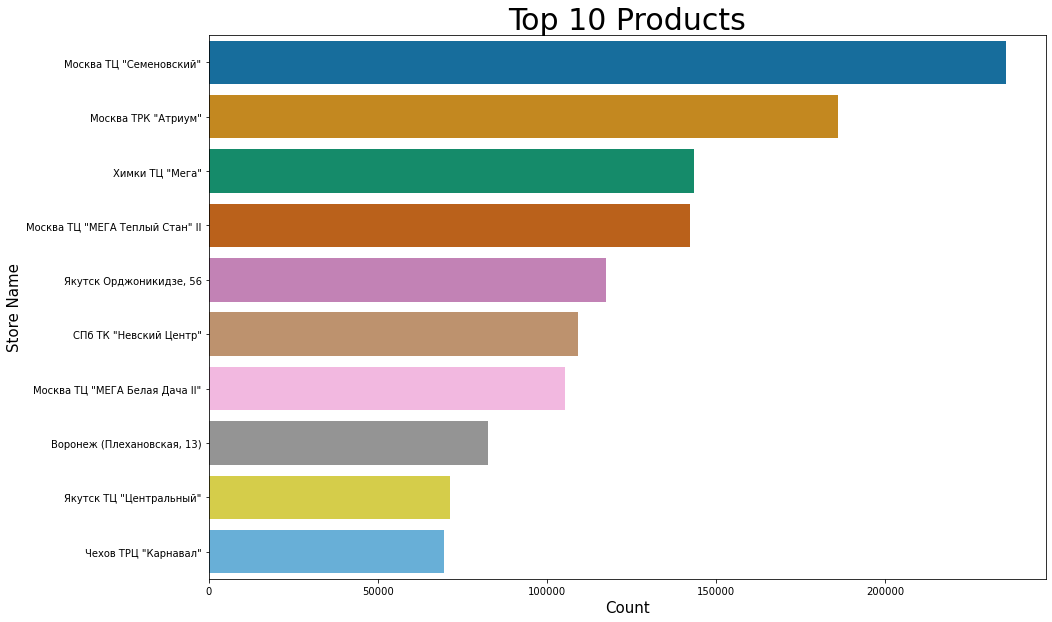

In [26]:
#Fetching top 10 selling products
top_10_selling_item = df_master['shop_name'].value_counts().head(10)
top_10_selling_item = top_10_selling_item.to_frame().reset_index()

#Plot for count of TOp 10 selling items based on stores
top_10_selling_item.columns = ['shop_name', 'count']
plt.figure(figsize=(15, 10))
sns.barplot(data=top_10_selling_item, x='count', y='shop_name', palette = 'colorblind')
plt.title('Top 10 Products', fontsize = 30)
plt.ylabel('Store Name', fontsize = 15)
plt.xlabel('Count', fontsize = 15)
plt.show()

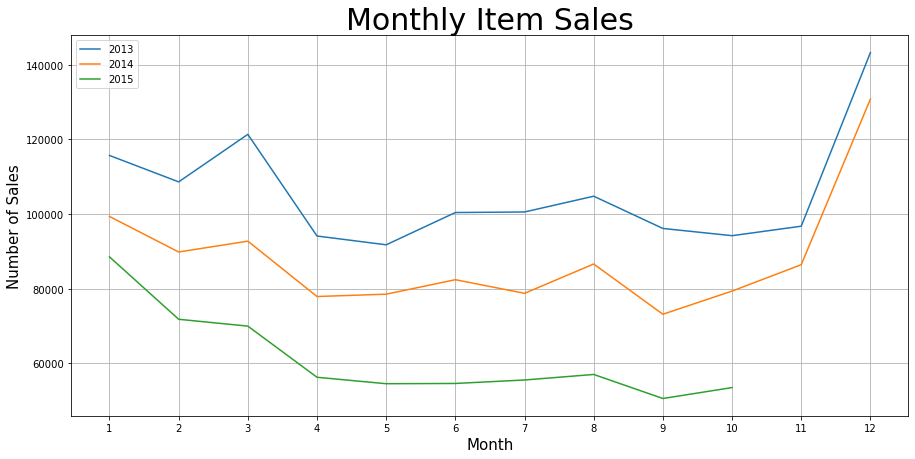

In [28]:
#Plot for trend lines for sales accross each year month wise

fig, ax = plt.subplots(figsize=(15, 7))

df_train[df_train['year'] == 2013].groupby('month').count()['item_id'].plot(ax=ax, label=2013)
df_train[df_train['year'] == 2014].groupby('month').count()['item_id'].plot(ax=ax, label=2014)
df_train[df_train['year'] == 2015].groupby('month').count()['item_id'].plot(ax=ax, label=2015)

ax.set_xticks(range(1, 13))
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Number of Sales', fontsize = 15)
ax.grid(True)
ax.set_title('Monthly Item Sales', fontsize = 30)

plt.legend()
plt.show()

In [32]:
# converting the data into monthly sales data

# making a dataset with only monthly sales data
data = df_train.groupby([df_train['date'].apply(lambda x: x.strftime('%Y-%m')),'item_id','shop_id']).sum().reset_index()

# feature selection
data = data[['date','item_id','shop_id','item_cnt_day']]

data = data.pivot_table(index=['item_id','shop_id'], columns = 'date', values = 'item_cnt_day', fill_value = 0).reset_index()

# looking at the newly prepared datset
data.shape

(424124, 36)

In [33]:
# Join the test and monthly data

test = pd.merge(df_test, data, on = ['item_id', 'shop_id'], how = 'left')

# filling the empty values found in the dataset
test.fillna(0, inplace = True)

# checking the dataset
test.head()

,ID,shop_id,item_id,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Implementation

In [34]:
# creating the training data

x_train = test.drop(['2015-10', 'item_id', 'shop_id'], axis = 1)
y_train = test['2015-10']

x_test = test.drop(['2013-01', 'item_id', 'shop_id'], axis = 1)

# checking the shapes of the datasets
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_train.shape)

Shape of x_train : (214200, 34)
Shape of x_test : (214200, 34)
Shape of y_test : (214200,)


In [35]:
# splitting the data into train and valid dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 2)

# checking the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (160650, 34)
Shape of x_test : (53550, 34)
Shape of y_train : (160650,)
Shape of y_test : (53550,)


## XGBOOST Model

In [43]:
#Implementing the XGBoost Model and fitting the model

from xgboost import XGBRegressor, plot_importance
xgb = XGBRegressor(seed = 123, 
    tree_method = "hist", #gpu_hist
    subsample = 0.9,
    n_estimators=1000,
    max_depth = 10,
    learning_rate = 0.5,
    gamma = 10,
    colsample_bytree = 0.9
    )

xgb.fit(
    x_train,y_train,
    eval_metric="rmse",
    eval_set=[(x_train, y_train), (x_test, y_test)],
    verbose=True,
    early_stopping_rounds = 50
    )

[0]	validation_0-rmse:1.94790	validation_1-rmse:9.85475
[1]	validation_0-rmse:1.70223	validation_1-rmse:9.73495
[2]	validation_0-rmse:1.45387	validation_1-rmse:9.67230
[3]	validation_0-rmse:1.33360	validation_1-rmse:9.62374
[4]	validation_0-rmse:1.27864	validation_1-rmse:9.60294
[5]	validation_0-rmse:1.24506	validation_1-rmse:9.58505
[6]	validation_0-rmse:1.22755	validation_1-rmse:9.58607
[7]	validation_0-rmse:1.21555	validation_1-rmse:9.57752
[8]	validation_0-rmse:1.20931	validation_1-rmse:9.57666
[9]	validation_0-rmse:1.20656	validation_1-rmse:9.57267
[10]	validation_0-rmse:1.19696	validation_1-rmse:9.57251
[11]	validation_0-rmse:1.19532	validation_1-rmse:9.57171
[12]	validation_0-rmse:1.19442	validation_1-rmse:9.57171
[13]	validation_0-rmse:1.19438	validation_1-rmse:9.57358
[14]	validation_0-rmse:1.19390	validation_1-rmse:9.57358
[15]	validation_0-rmse:1.19244	validation_1-rmse:9.57314
[16]	validation_0-rmse:1.19163	validation_1-rmse:9.57354
[17]	validation_0-rmse:1.19155	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=10, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
 #Calculating the RMSE value for XGBOOST Model
from sklearn.metrics import mean_squared_error as MSE
# Predict the model
pred = xgb.predict(x_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  9.571709


## LightGBM Model

In [50]:
#Implementing the LightGBM Model and fitting the model

from lightgbm import LGBMRegressor

model_lgb = LGBMRegressor( n_estimators=200,
                           learning_rate=0.03,
                           num_leaves=32,
                           colsample_bytree=0.9497036,
                           subsample=0.8715623,
                           max_depth=8,
                           reg_alpha=0.04,
                           reg_lambda=0.073,
                           min_split_gain=0.0222415,
                           min_child_weight=40)
model_lgb.fit(x_train, y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 160650, number of used features: 34
[LightGBM] [Info] Start training from score 0.283673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

LGBMRegressor(colsample_bytree=0.9497036, learning_rate=0.03, max_depth=8,
              min_child_weight=40, min_split_gain=0.0222415, n_estimators=200,
              num_leaves=32, reg_alpha=0.04, reg_lambda=0.073,
              subsample=0.8715623)

In [49]:
#Calculating the RMSE value for LightGBM Model

#Predicting the model
y_pred_lgb = model_lgb.predict(x_test)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred_lgb))
print("RMSE : % f" %(rmse))

RMSE :  9.496249


## Conclusion:

As we can see that the root mean squared error value for XGBoost model is approximately 9.57 and that of LightGBM model is 9.49, we could conclude that the LightGBM model is better for predictions in this case. However, we might observe that both the RMSE values are quite high, but w.r.t. sales, this is a very minimal number and hence, we could say that the model fit is good and out of the two models we tried, LightGBM is slightly better.